# Análisis textual de La Voz del Sur y Letra Fría

## Data cleaning La Voz del Sur

In [3]:
#!pip install pandas
import pandas as pd
# pd.read_csv is for .cvs files, but this one is Excel so it's pd.read_excel, followed by the file route.
# When reading Excel files I usually open them first in Excel to get familiar with the data structure.
# After commas we can add additional instructions, such as the sheet name. We are not using the first two rows, so we are skipping them.

# Loading every file as separate dataframes. I'm identifying them with distinct names, but we will be combining them into a single larger dataframe in a bit.
#La Voz del Sur
dfvoz = pd.read_csv('scraped data/articulos_lavozdelsur.csv')
#dfvoz = pd.read_csv('articulos_lavozdelsur.csv')

In [4]:
# First we import pandas, our library to work with data sets
import pandas as pd
# This below it's optional, but I like to add it so it shows me all columns in the preview, specially useful for wide tables
pd.options.display.max_columns = None

# This below are optional too but I don't think I'll be using it
#remove scientific notation
#pd.options.display.float_format = '{:.2f}'.format

import re

In [5]:
# Eliminar duplicados (conservando primeros)
voz = dfvoz.drop_duplicates()
voz

titulo  \
0     Dan Banderazo de Arranque al Operativo de Sema...   
1              La Falta de Vigilancia en las Carreteras   
2     Banda Real de la Montaña Lleva su Música al Fe...   
3     Muere un Hombre Atropellado en la Autopista Gu...   
4     Conforman Ayuntamiento Infantil 2025 Frente Au...   
...                                                 ...   
1051  Toluca, Real Huescalapa y Rayos de Zapotiltic ...   
1052  Abren Nevado a Visitantes Para Disfrutar el Pa...   
1053  Pablo Lemus Lleva Amplia Ventaja Sobre Otros P...   
1054  Bajío, San José y Nuevos Valores Triunfan en l...   
1055  Parque Nacional Nevado de Colima Permanecerá C...   

                                               articulo                 fecha  \
0     Published on abril 12th, 2025 | by lavozsur\n\...      abril 12th, 2025   
1     Published on abril 11th, 2025 | by lavozsur\n\...      abril 11th, 2025   
2     Published on abril 11th, 2025 | by lavozsur\n\...      abril 11th, 2025   
3     Published on abril 10th, 2025 | by lavozsur\n\...      abril 10th, 2025   
4     Published on abril 9th, 2025 | by lavozsur\n\n...       abril 9th, 2025   
...                                                 ...                   ...   
1051  Published on diciembre 27th, 2023 | by lavozsu...  diciembre 27th, 2023   
1052  Published on diciembre 27th, 2023 | by lavozsu...  diciembre 27th, 2023   
1053  Published on diciembre 26th, 2023 | by lavozsu...  diciembre 26th, 2023   
1054  Published on diciembre 26th, 2023 | by lavozsu...  diciembre 26th, 2023   
1055  Published on diciembre 26th, 2023 | by lavozsu...  diciembre 26th, 2023   

                                                    url  
0     https://www.lavozdelsur.com.mx/dan-banderazo-d...  
1     https://www.lavozdelsur.com.mx/la-falta-de-vig...  
2     https://www.lavozdelsur.com.mx/banda-real-de-l...  
3     https://www.lavozdelsur.com.mx/muere-un-hombre...  
4     https://www.lavozdelsur.com.mx/conforman-ayunt...  
...                                                 ...  
1051  https://www.lavozdelsur.com.mx/toluca-real-hue...  
1052  https://www.lavozdelsur.com.mx/abren-nevado-a-...  
1053  https://www.lavozdelsur.com.mx/pablo-lemus-lle...  
1054  https://www.lavozdelsur.com.mx/bajio-san-jose-...  
1055  https://www.lavozdelsur.com.mx/parque-nacional...  

[1056 rows x 4 columns]

In [6]:
# Función para extraer los tags y limpiar el artículo
def procesar_articulo(texto):
    # Buscar los tags (ejemplo: "Tags: Chava Zamora, jalisco, ...")
    tags_match = re.search(r'Tags:\s*(.*?)(?=\n\n|$)', texto, flags=re.DOTALL | re.IGNORECASE)
    tags = tags_match.group(1).strip() if tags_match else ""

    # Eliminar la línea de tags del artículo
    texto_limpio = re.sub(r'Tags:.*?(?=\n\n|$)', '', texto, flags=re.DOTALL | re.IGNORECASE)

    # Limpieza adicional (lo que ya teníamos antes)
    texto_limpio = re.sub(r'Published on.*?by lavozsur', '', texto_limpio, flags=re.DOTALL)
    texto_limpio = re.sub(r'lavozsur Con 35 años de trayectoria.*?Jalisco\.', '', texto_limpio, flags=re.DOTALL)
    texto_limpio = re.sub(r'Comments are closed\.', '', texto_limpio, flags=re.DOTALL)
    texto_limpio = texto_limpio.strip()

    return texto_limpio, tags

# Aplicar la función y crear las nuevas columnas
voz[['articulo', 'tags']] = pd.DataFrame(voz['articulo'].apply(procesar_articulo).tolist(), index=voz.index)

# Reordenar columnas (opcional)
voz = voz[['titulo', 'articulo', 'tags', 'fecha', 'url']]
# Guardar el resultado
#voz.to_csv('vozdelsur_limpio_con_tags.csv', index=False)

In [7]:
# Función para extraer el lugar y limpiar el artículo
def extraer_lugar(texto):
    # Patrón para ciudades en mayúsculas seguidas de "JAL." o similares
    lugar_match = re.search(r'^([A-ZÁÉÍÓÚÜÑ\s]+(?:,\s*JAL\.?|\.))', texto)
    if lugar_match:
        lugar = lugar_match.group(1).strip()
        texto_limpio = texto.replace(lugar, '', 1).strip()
    else:
        lugar = ""
        texto_limpio = texto
    return texto_limpio, lugar

# Aplicar la función para extraer lugares
voz[['articulo', 'lugar']] = pd.DataFrame(voz['articulo'].apply(extraer_lugar).tolist(), index=voz.index)

# Función para verificar si contiene (ES)
def contiene_ES(texto):
    return 'yes' if '(ES)' in texto else 'no'

# Crear columna 'contiene_ES'
voz['contiene_ES'] = voz['articulo'].apply(contiene_ES)

# Reordenar columnas (opcional)
column_order = ['titulo', 'articulo', 'lugar', 'tags', 'contiene_ES', 'fecha', 'url']
voz = voz[column_order]

# Guardar el resultado
voz.to_csv('cleaned_vozdelsur.csv', index=False, encoding='utf-8-sig')

In [8]:
voz

titulo  \
0     Dan Banderazo de Arranque al Operativo de Sema...   
1              La Falta de Vigilancia en las Carreteras   
2     Banda Real de la Montaña Lleva su Música al Fe...   
3     Muere un Hombre Atropellado en la Autopista Gu...   
4     Conforman Ayuntamiento Infantil 2025 Frente Au...   
...                                                 ...   
1051  Toluca, Real Huescalapa y Rayos de Zapotiltic ...   
1052  Abren Nevado a Visitantes Para Disfrutar el Pa...   
1053  Pablo Lemus Lleva Amplia Ventaja Sobre Otros P...   
1054  Bajío, San José y Nuevos Valores Triunfan en l...   
1055  Parque Nacional Nevado de Colima Permanecerá C...   

                                               articulo                lugar  \
0     *Autoridades de los tres niveles de gobierno t...                        
1     Sin duda alguna, los recientes cierres en las ...                        
2     Las potentes y muy alegres notas del estilo mu...                        
3     , (ES).- Intensa movilización de unidades de e...   GÓMEZ FARÍAS, JAL.   
4     (ES).- El Gobierno Municipal de Zapotlán el Gr...  CIUDAD GUZMÁN, JAL.   
...                                                 ...                  ...   
1051  , (ES).- En la jornada 9 en la Liga de Fútbol ...  CIUDAD GUZMÁN, JAL.   
1052  *Habrá Restricciones Para Vehículos Compactos\...                        
1053  Durante el 9 y 13 de diciembre la empresa Tych...                        
1054  , (ES).- En el fútbol de la Categoría los equi...  CIUDAD GUZMÁN, JAL.   
1055  *La Capa Blanca que se Aprecia en el Volcán de...                        

                                                   tags contiene_ES  \
0     Chava Zamora, jalisco, la voz del sur de jalis...          no   
1     autopistas, Ciudad Guzmán, Falta de Agua, Oper...          no   
2     Cultura, La Vos del Sur, Múscia Regional Mexic...          no   
3     autopista, Ciuadad Guzmán, GómezFarías, muerto...         yes   
4     Ayuntamiento Infantil de Zapotlán, Cabildo Inf...         yes   
...                                                 ...         ...   
1051  Ciudad Guzmán, deportes, futbol, huescalapa, I...         yes   
1052  Ciudad Guzmán, colima, la voz del sur de jalis...         yes   
1053  Ciudad Guzmán, Elecciones 2024, encuestas, Gub...          no   
1054  Bajío, Categoría Juvenil, Ciudad Guzmán, Club ...         yes   
1055  Ciudad Guzmán, colima, El Nevado de Colima, gr...         yes   

                     fecha                                                url  
0         abril 12th, 2025  https://www.lavozdelsur.com.mx/dan-banderazo-d...  
1         abril 11th, 2025  https://www.lavozdelsur.com.mx/la-falta-de-vig...  
2         abril 11th, 2025  https://www.lavozdelsur.com.mx/banda-real-de-l...  
3         abril 10th, 2025  https://www.lavozdelsur.com.mx/muere-un-hombre...  
4          abril 9th, 2025  https://www.lavozdelsur.com.mx/conforman-ayunt...  
...                    ...                                                ...  
1051  diciembre 27th, 2023  https://www.lavozdelsur.com.mx/toluca-real-hue...  
1052  diciembre 27th, 2023  https://www.lavozdelsur.com.mx/abren-nevado-a-...  
1053  diciembre 26th, 2023  https://www.lavozdelsur.com.mx/pablo-lemus-lle...  
1054  diciembre 26th, 2023  https://www.lavozdelsur.com.mx/bajio-san-jose-...  
1055  diciembre 26th, 2023  https://www.lavozdelsur.com.mx/parque-nacional...  

[1056 rows x 7 columns]

## Letra fría

In [9]:
# Loading every file as separate dataframes. I'm identifying them with distinct names, but we will be combining them into a single larger dataframe in a bit.
#La Voz del Sur

dfletra = pd.read_csv('scraped data/letra_fria_200_20250414_120843.csv')
#dfletra = pd.read_csv('letra_fria_200_20250414_120843.csv')
dfletra

titulo  \
0      Prohíben acceso de vehículos a playas de Melaque   
1     Abrirán módulo permanente de licencias de cond...   
2     Tras protestas, acuerdan mesas de trabajo por ...   
3     Encuentro Jóvenes y Agroecología en El Limón s...   
4                                          Sandra Borja   
...                                                 ...   
1393  Unión de Tvla alista todo para vivir el Festiv...   
1394   Prohíben acceso de vehículos a playas de Melaque   
1395  Abrirán módulo permanente de licencias de cond...   
1396  Encuentro Jóvenes y Agroecología en El Limón s...   
1397                                       Sandra Borja   

                                               articulo  fecha  autor  \
0     Cihuatlán, Jalisco.- La delegación municipal d...    NaN    NaN   
1     El Grullo, Jalisco.- A través de una gestión r...    NaN    NaN   
2     Guadalajara, Jalisco.- Estudiantes de la Unive...    NaN    NaN   
3     El Limón, Jalisco.- El Encuentro Jóvenes y Agr...    NaN    NaN   
4     Mientras vivimos tiempos de cuaresma, de “guar...    NaN    NaN   
...                                                 ...    ...    ...   
1393  Por: Vianney Martínez Pérez\n\nUnión de Tvla, ...    NaN    NaN   
1394  Cihuatlán, Jalisco.- La delegación municipal d...    NaN    NaN   
1395  El Grullo, Jalisco.- A través de una gestión r...    NaN    NaN   
1396  El Limón, Jalisco.- El Encuentro Jóvenes y Agr...    NaN    NaN   
1397  Mientras vivimos tiempos de cuaresma, de “guar...    NaN    NaN   

                                                    url categoria  
0     https://letrafria.com/prohiben-acceso-de-vehic...    Región  
1     https://letrafria.com/abriran-modulo-permanent...    Región  
2     https://letrafria.com/tras-protestas-acuerdan-...    Región  
3     https://letrafria.com/encuentro-jovenes-y-agro...    Región  
4                   https://letrafria.com/sandra-borja/    Región  
...                                                 ...       ...  
1393  https://letrafria.com/union-de-tvla-alista-tod...    Región  
1394  https://letrafria.com/prohiben-acceso-de-vehic...    Región  
1395  https://letrafria.com/abriran-modulo-permanent...    Región  
1396  https://letrafria.com/encuentro-jovenes-y-agro...    Región  
1397                https://letrafria.com/sandra-borja/    Región  

[1398 rows x 6 columns]

In [10]:
# Eliminar duplicados (conservando primeros)
letra = dfletra.drop_duplicates()
letra

titulo  \
0      Prohíben acceso de vehículos a playas de Melaque   
1     Abrirán módulo permanente de licencias de cond...   
2     Tras protestas, acuerdan mesas de trabajo por ...   
3     Encuentro Jóvenes y Agroecología en El Limón s...   
4                                          Sandra Borja   
...                                                 ...   
1385               Hay menos pobres en Jalisco: Coneval   
1386  Itei impone amonestaciones, otra vez, a funcio...   
1391  Romería 2023: La virgen peregrina regresa a At...   
1392  Todo listo para celebrar el Día de las Paseado...   
1393  Unión de Tvla alista todo para vivir el Festiv...   

                                               articulo  fecha  autor  \
0     Cihuatlán, Jalisco.- La delegación municipal d...    NaN    NaN   
1     El Grullo, Jalisco.- A través de una gestión r...    NaN    NaN   
2     Guadalajara, Jalisco.- Estudiantes de la Unive...    NaN    NaN   
3     El Limón, Jalisco.- El Encuentro Jóvenes y Agr...    NaN    NaN   
4     Mientras vivimos tiempos de cuaresma, de “guar...    NaN    NaN   
...                                                 ...    ...    ...   
1385  Por: Lauro Rodríguez.\n\nGuadalajara, Jalisco....    NaN    NaN   
1386  Por: Lauro Rodríguez.\n\nTomatlán, Jalisco.- E...    NaN    NaN   
1391  Por: Vianney Martínez Pérez\n\nAtengo, Jalisco...    NaN    NaN   
1392  Por: Vianney Martínez Pérez\n\nLa Huerta, Jali...    NaN    NaN   
1393  Por: Vianney Martínez Pérez\n\nUnión de Tvla, ...    NaN    NaN   

                                                    url categoria  
0     https://letrafria.com/prohiben-acceso-de-vehic...    Región  
1     https://letrafria.com/abriran-modulo-permanent...    Región  
2     https://letrafria.com/tras-protestas-acuerdan-...    Región  
3     https://letrafria.com/encuentro-jovenes-y-agro...    Región  
4                   https://letrafria.com/sandra-borja/    Región  
...                                                 ...       ...  
1385  https://letrafria.com/hay-menos-pobres-en-jali...    Región  
1386  https://letrafria.com/itei-impone-amonestacion...    Región  
1391  https://letrafria.com/romeria-2023-la-virgen-p...    Región  
1392  https://letrafria.com/todo-listo-para-celebrar...    Región  
1393  https://letrafria.com/union-de-tvla-alista-tod...    Región  

[602 rows x 6 columns]

In [11]:
# Función para extraer los bylines y limpiar el artículo
def procesar_articulo(texto):
    # Buscar los bylines (ejemplo: "Por: Lauro Rodríguez, 	Por: Vianney Martínez Pérez, etc")
    tags_match = re.search(r'Por:\s*(.*?)(?=\n\n|$)', texto, flags=re.DOTALL | re.IGNORECASE)
    tags = tags_match.group(1).strip() if tags_match else ""

    # Eliminar la línea de tags del artículo
    texto_limpio = re.sub(r'Por:.*?(?=\n\n|$)', '', texto, flags=re.DOTALL | re.IGNORECASE)

    # Limpieza adicional
    texto_limpio = re.sub(r'Suscríbete a nuestro WhatsApp y recibe las noticias todos los días\.', '', texto_limpio, flags=re.DOTALL)
    texto_limpio = texto_limpio.strip()

    return texto_limpio, tags

# Aplicar la función y crear las nuevas columnas
letra = letra.copy()
letra[['articulo', 'autor']] = pd.DataFrame(letra['articulo'].apply(procesar_articulo).tolist(), index=letra.index)

# Reordenar columnas (opcional)
letra = letra[['titulo', 'articulo', 'autor', 'fecha', 'url']]
# Guardar el resultado
#letra.to_csv('letradelsur_limpio_con_tags.csv', index=False)

In [12]:
def extraer_lugar(texto):
    # Patrón más flexible para nombres de ciudad (1-5 palabras) seguidas de "Jalisco.-"
    lugar_match = re.search(r'((?:\b[\wáéíóúüñÁÉÍÓÚÜÑ]+\b\s*){1,5}, Jalisco\.-)', texto)
    if lugar_match:
        lugar = lugar_match.group(1).strip()
        # Eliminar ".-" al final y cualquier espacio sobrante
        lugar = re.sub(r'\.-\s*$', '', lugar)
        texto_limpio = texto.replace(lugar_match.group(0), '', 1).strip()
        # Limpieza adicional: eliminar espacios dobles que puedan quedar
        texto_limpio = re.sub(r'\s+', ' ', texto_limpio).strip()
    else:
        lugar = ""
        texto_limpio = texto
    return texto_limpio, lugar

# Aplicar la función para extraer lugares
letra[['articulo', 'lugar']] = pd.DataFrame(letra['articulo'].apply(extraer_lugar).tolist(), index=letra.index)


# Reordenar columnas (opcional)
column_order = ['titulo', 'articulo', 'lugar', 'autor', 'fecha', 'url']
letra = letra[column_order]

# Guardar el resultado
letra.to_csv('cleaned_letrafria.csv', index=False, encoding='utf-8-sig')

## Prueba análisis de contenido con SpaCy

In [13]:
#!pip install -U spacy
#!python -m spacy download es_core_news_md  # Modelo mediano (recomendado)

In [14]:
import spacy

# Carga el modelo en español
nlp = spacy.load("es_core_news_md")

# Texto de ejemplo (puedes aplicarlo a tu columna 'articulo')
texto = "Apple está en Cupertino, California. Guadalajara es una ciudad de México."

# Procesa el texto y extrae entidades (LOC = lugares)
doc = nlp(texto)
lugares = [ent.text for ent in doc.ents if ent.label_ == "LOC"]

print(lugares)  # Output: ['Cupertino', 'California', 'Guadalajara', 'México']

['California', 'Guadalajara', 'México']


In [15]:
import spacy
from collections import Counter

# Carga el modelo en español (ejecuta primero: python -m spacy download es_core_news_md)
nlp = spacy.load("es_core_news_md")

def analizar_articulo(texto):
    doc = nlp(texto)

    # 1. Entidades nombradas (ej: lugares, personas)
    entidades = [(ent.text, ent.label_) for ent in doc.ents]

    # 2. Sustantivos y adjetivos (para temas clave)
    palabras_clave = [token.text for token in doc if token.pos_ in ["NOUN", "ADJ"]]

    # 3. Lematización
    lemas = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]

    # 4. Frecuencia de términos
    frecuencias = Counter([token.text.lower() for token in doc if not token.is_stop and token.is_alpha])

    return {
        "entidades": entidades,
        "palabras_clave": palabras_clave[:10],  # Top 10
        "lemas": lemas[:20],  # Primeros 20 lemas
        "frecuencias": frecuencias.most_common(5)  # Top 5 palabras
    }

# Aplica a tu columna 'articulo'
voz["analisis"] = voz["articulo"].apply(analizar_articulo)

# Ejemplo de acceso a los resultados
print(voz["analisis"])  # Ver análisis del primer artículo

0       {'entidades': [('UEPCBJ', 'ORG'), ('Puesto de ...
1       {'entidades': [('Sur de Jalisco', 'LOC'), ('Se...
2       {'entidades': [('Minatitlán', 'LOC'), ('Veracr...
3       {'entidades': [('ES).-', 'LOC'), ('Autopista G...
4       {'entidades': [('ES).-', 'LOC'), ('Gobierno Mu...
                              ...                        
1051    {'entidades': [('ES).-', 'LOC'), ('Liga de Fút...
1052    {'entidades': [('Habrá Restricciones Para Vehí...
1053    {'entidades': [('Tyché', 'MISC'), ('Movimiento...
1054    {'entidades': [('ES).-', 'LOC'), ('Categoría',...
1055    {'entidades': [('La Capa Blanca', 'LOC'), ('Ap...
Name: analisis, Length: 1056, dtype: object


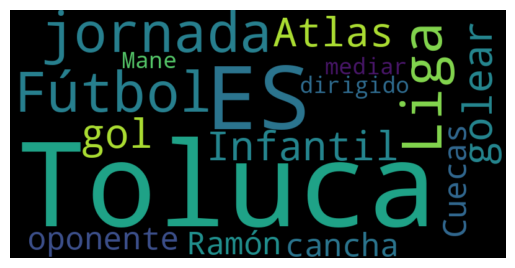

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generar nube de palabras para el primer artículo
texto = " ".join(voz["analisis"].iloc[1051]["lemas"])
wordcloud = WordCloud(width=800, height=400).generate(texto)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

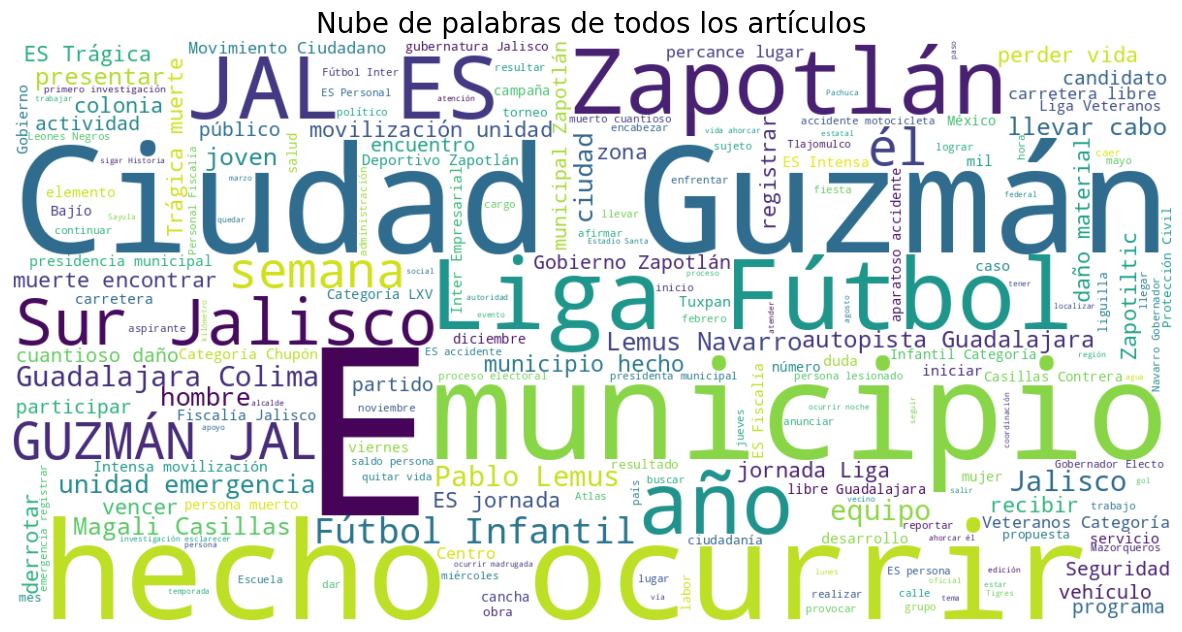

In [17]:


# Suponiendo que ya tienes el DataFrame df con la columna 'analisis' (lemas)
# Concatenar TODOS los lemas de todos los artículos
texto_completo = " ".join([lemma for sublist in voz["analisis"].apply(lambda x: x["lemas"]) for lemma in sublist])

# Opcional: Filtrar palabras irrelevantes (ej: preposiciones, artículos)
stopwords = ["de", "la", "el", "en", "y", "a", "los", "las", "del"]
texto_filtrado = " ".join([word for word in texto_completo.split() if word.lower() not in stopwords])

# Crear y mostrar la nube de palabras
wordcloud = WordCloud(
    width=1200,
    height=600,
    background_color='white',
    stopwords=stopwords,  # Filtra automáticamente
    max_words=200,
    colormap='viridis'  # Paleta de colores
).generate(texto_filtrado)

plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de palabras de todos los artículos', fontsize=20)
plt.show()

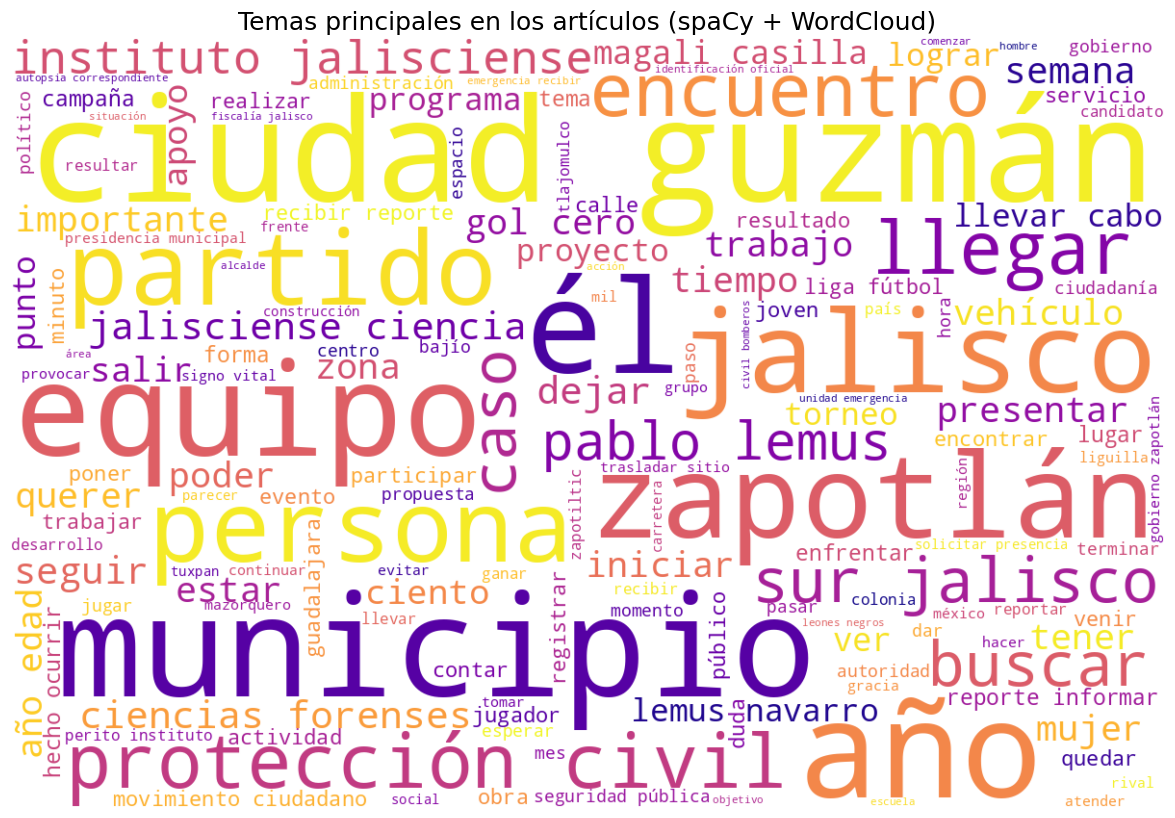

In [18]:
## Análisis de contenido

# 1. Procesar TODOS los artículos y extraer lemas relevantes
def procesar_texto(texto):
    doc = nlp(texto)
    # Filtra: lemas no stopwords, alfabéticos y longitud > 2
    lemas = [token.lemma_.lower() for token in doc
             if not token.is_stop and token.is_alpha and len(token.lemma_) > 2]
    return " ".join(lemas)

# Aplicar a todos los artículos (usando .progress_apply si tienes tqdm para barra de progreso)
texto_procesado = " ".join(voz["articulo"].apply(procesar_texto))

# 2. Generar la nube de palabras
wordcloud = WordCloud(
    width=1200,
    height=800,
    background_color='white',
    max_words=150,
    colormap='plasma',  # Prueba 'viridis', 'magma', 'inferno'
    stopwords=["ser", "haber"]  # Añade stopwords manualmente si es necesario
).generate(texto_procesado)

# 3. Mostrar y guardar
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Temas principales en los artículos (spaCy + WordCloud)', fontsize=18)
plt.savefig('nube_palabras_spacy_voz.png', bbox_inches='tight', dpi=300)  # Guardar en HD
plt.show()

In [19]:
from transformers import pipeline
import pandas as pd

# 1. Cargar el modelo (se descarga la primera vez)
classifier = pipeline(
    "text-classification",
    model="finiteautomata/beto-sentiment-analysis",
    tokenizer="finiteautomata/beto-sentiment-analysis"
)

# 2. Función para clasificar (maneja textos largos)
def clasificar_sentimiento(texto):
    chunks = [texto[i:i+512] for i in range(0, len(texto), 512)]  # Divide en trozos de 512 tokens
    resultados = [classifier(chunk)[0]['label'] for chunk in chunks]
    # Cuenta votos (si hay trozos con distintos sentimientos)
    return max(set(resultados), key=resultados.count)

# 3. Aplicar al DataFrame (puede tardar en datasets grandes)
voz['sentimiento'] = voz['articulo'].apply(clasificar_sentimiento)

# Ver resultados
print(voz[['articulo', 'sentimiento']].head())

Device set to use cpu


                                            articulo sentimiento
0  *Autoridades de los tres niveles de gobierno t...         NEU
1  Sin duda alguna, los recientes cierres en las ...         NEG
2  Las potentes y muy alegres notas del estilo mu...         POS
3  , (ES).- Intensa movilización de unidades de e...         NEU
4  (ES).- El Gobierno Municipal de Zapotlán el Gr...         NEU


In [20]:
voz

titulo  \
0     Dan Banderazo de Arranque al Operativo de Sema...   
1              La Falta de Vigilancia en las Carreteras   
2     Banda Real de la Montaña Lleva su Música al Fe...   
3     Muere un Hombre Atropellado en la Autopista Gu...   
4     Conforman Ayuntamiento Infantil 2025 Frente Au...   
...                                                 ...   
1051  Toluca, Real Huescalapa y Rayos de Zapotiltic ...   
1052  Abren Nevado a Visitantes Para Disfrutar el Pa...   
1053  Pablo Lemus Lleva Amplia Ventaja Sobre Otros P...   
1054  Bajío, San José y Nuevos Valores Triunfan en l...   
1055  Parque Nacional Nevado de Colima Permanecerá C...   

                                               articulo                lugar  \
0     *Autoridades de los tres niveles de gobierno t...                        
1     Sin duda alguna, los recientes cierres en las ...                        
2     Las potentes y muy alegres notas del estilo mu...                        
3     , (ES).- Intensa movilización de unidades de e...   GÓMEZ FARÍAS, JAL.   
4     (ES).- El Gobierno Municipal de Zapotlán el Gr...  CIUDAD GUZMÁN, JAL.   
...                                                 ...                  ...   
1051  , (ES).- En la jornada 9 en la Liga de Fútbol ...  CIUDAD GUZMÁN, JAL.   
1052  *Habrá Restricciones Para Vehículos Compactos\...                        
1053  Durante el 9 y 13 de diciembre la empresa Tych...                        
1054  , (ES).- En el fútbol de la Categoría los equi...  CIUDAD GUZMÁN, JAL.   
1055  *La Capa Blanca que se Aprecia en el Volcán de...                        

                                                   tags contiene_ES  \
0     Chava Zamora, jalisco, la voz del sur de jalis...          no   
1     autopistas, Ciudad Guzmán, Falta de Agua, Oper...          no   
2     Cultura, La Vos del Sur, Múscia Regional Mexic...          no   
3     autopista, Ciuadad Guzmán, GómezFarías, muerto...         yes   
4     Ayuntamiento Infantil de Zapotlán, Cabildo Inf...         yes   
...                                                 ...         ...   
1051  Ciudad Guzmán, deportes, futbol, huescalapa, I...         yes   
1052  Ciudad Guzmán, colima, la voz del sur de jalis...         yes   
1053  Ciudad Guzmán, Elecciones 2024, encuestas, Gub...          no   
1054  Bajío, Categoría Juvenil, Ciudad Guzmán, Club ...         yes   
1055  Ciudad Guzmán, colima, El Nevado de Colima, gr...         yes   

                     fecha                                                url  \
0         abril 12th, 2025  https://www.lavozdelsur.com.mx/dan-banderazo-d...   
1         abril 11th, 2025  https://www.lavozdelsur.com.mx/la-falta-de-vig...   
2         abril 11th, 2025  https://www.lavozdelsur.com.mx/banda-real-de-l...   
3         abril 10th, 2025  https://www.lavozdelsur.com.mx/muere-un-hombre...   
4          abril 9th, 2025  https://www.lavozdelsur.com.mx/conforman-ayunt...   
...                    ...                                                ...   
1051  diciembre 27th, 2023  https://www.lavozdelsur.com.mx/toluca-real-hue...   
1052  diciembre 27th, 2023  https://www.lavozdelsur.com.mx/abren-nevado-a-...   
1053  diciembre 26th, 2023  https://www.lavozdelsur.com.mx/pablo-lemus-lle...   
1054  diciembre 26th, 2023  https://www.lavozdelsur.com.mx/bajio-san-jose-...   
1055  diciembre 26th, 2023  https://www.lavozdelsur.com.mx/parque-nacional...   

                                               analisis sentimiento  
0     {'entidades': [('UEPCBJ', 'ORG'), ('Puesto de ...         NEU  
1     {'entidades': [('Sur de Jalisco', 'LOC'), ('Se...         NEG  
2     {'entidades': [('Minatitlán', 'LOC'), ('Veracr...         POS  
3     {'entidades': [('ES).-', 'LOC'), ('Autopista G...         NEU  
4     {'entidades': [('ES).-', 'LOC'), ('Gobierno Mu...         NEU  
...                                                 ...         ...  
1051  {'entidades': [('ES).-', 'LOC'), ('Liga de Fút...        

In [21]:
# Guardar el resultado
voz.to_csv('analisis_vozdelsur.csv', index=False, encoding='utf-8-sig')

### Análisis Letra Fría

In [22]:
# Aplica a tu columna 'articulo'
letra["analisis"] = letra["articulo"].apply(analizar_articulo)

# Ejemplo de acceso a los resultados
print(letra["analisis"])  # Ver análisis del primer artículo

0       {'entidades': [('San Patricio Melaque', 'LOC')...
1       {'entidades': [('El Grullo', 'LOC'), ('Secreta...
2       {'entidades': [('Estudiantes de la', 'ORG'), (...
3       {'entidades': [('Encuentro Jóvenes', 'MISC'), ...
4       {'entidades': [('la biblia', 'MISC'), ('NADIE'...
                              ...                        
1385    {'entidades': [('Guadalajara', 'LOC'), ('Jalis...
1386    {'entidades': [('Pleno del Instituto de Transp...
1391    {'entidades': [('La peregrina', 'MISC'), ('Nat...
1392    {'entidades': [('Costa Sur', 'LOC'), ('Día de ...
1393    {'entidades': [('Día de las Paseadoras', 'MISC...
Name: analisis, Length: 602, dtype: object


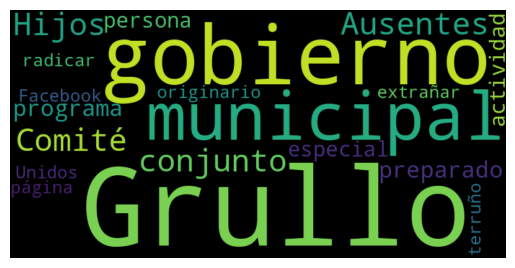

In [23]:


# Generar nube de palabras para el primer artículo
texto = " ".join(letra["analisis"].iloc[341]["lemas"])
wordcloud = WordCloud(width=800, height=400).generate(texto)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

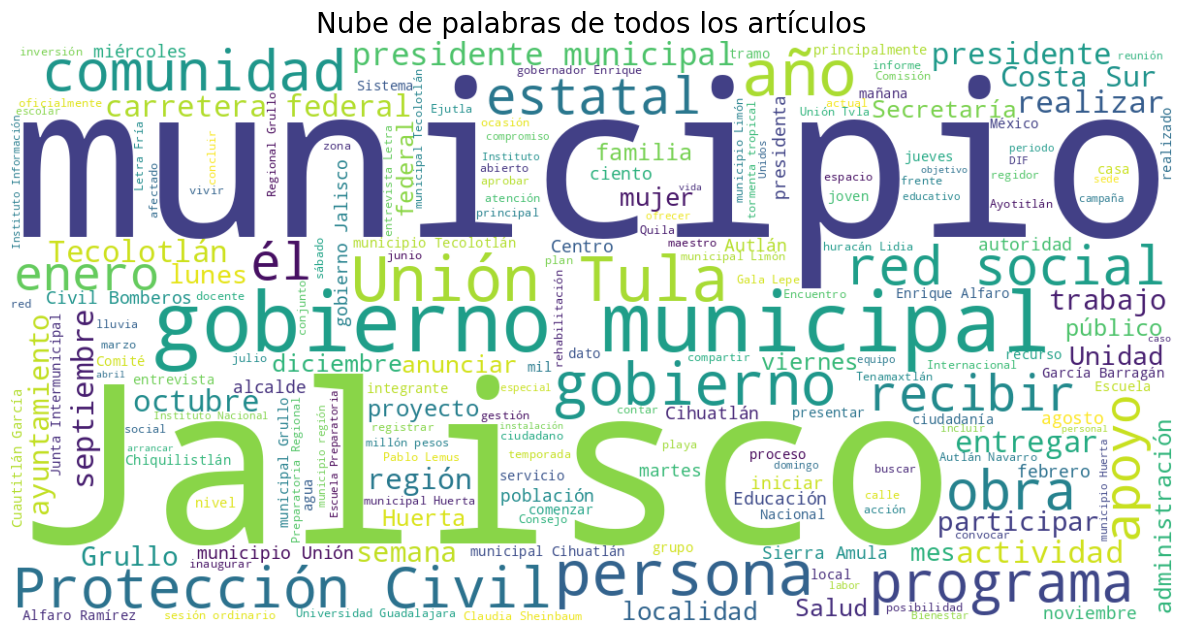

In [24]:


# Suponiendo que ya tienes el DataFrame df con la columna 'analisis' (lemas)
# Concatenar TODOS los lemas de todos los artículos
texto_completo = " ".join([lemma for sublist in letra["analisis"].apply(lambda x: x["lemas"]) for lemma in sublist])

# Opcional: Filtrar palabras irrelevantes (ej: preposiciones, artículos)
stopwords = ["de", "la", "el", "en", "y", "a", "los", "las", "del"]
texto_filtrado = " ".join([word for word in texto_completo.split() if word.lower() not in stopwords])

# Crear y mostrar la nube de palabras
wordcloud = WordCloud(
    width=1200,
    height=600,
    background_color='white',
    stopwords=stopwords,  # Filtra automáticamente
    max_words=200,
    colormap='viridis'  # Paleta de colores
).generate(texto_filtrado)

plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de palabras de todos los artículos', fontsize=20)
plt.show()

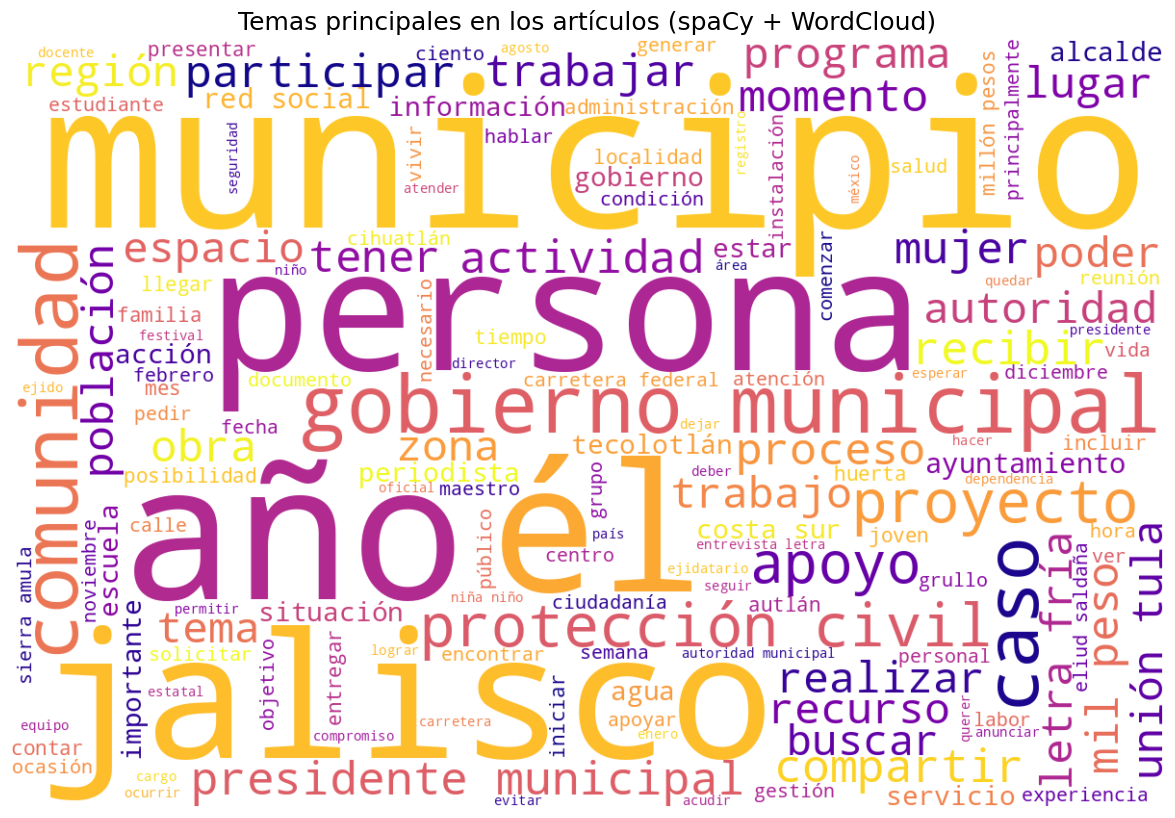

In [25]:

# Carga el modelo de spaCy en español
nlp = spacy.load("es_core_news_md")

# 1. Procesar TODOS los artículos y extraer lemas relevantes
def procesar_texto(texto):
    doc = nlp(texto)
    # Filtra: lemas no stopwords, alfabéticos y longitud > 2
    lemas = [token.lemma_.lower() for token in doc
             if not token.is_stop and token.is_alpha and len(token.lemma_) > 2]
    return " ".join(lemas)

# Aplicar a todos los artículos (usando .progress_apply si tienes tqdm para barra de progreso)
texto_procesado = " ".join(letra["articulo"].apply(procesar_texto))

# 2. Generar la nube de palabras
wordcloud = WordCloud(
    width=1200,
    height=800,
    background_color='white',
    max_words=150,
    colormap='plasma',  # Prueba 'viridis', 'magma', 'inferno'
    stopwords=["ser", "haber"]  # Añade stopwords manualmente si es necesario
).generate(texto_procesado)

# 3. Mostrar y guardar
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Temas principales en los artículos (spaCy + WordCloud)', fontsize=18)
plt.savefig('nube_palabras_spacy.png', bbox_inches='tight', dpi=300)  # Guardar en HD
plt.show()

In [26]:
#Análisis de sentimiento

# 3. Aplicar al DataFrame (puede tardar en datasets grandes)
letra['sentimiento'] = letra['articulo'].apply(clasificar_sentimiento)

# Ver resultados
print(letra[['articulo', 'sentimiento']].head())

                                            articulo sentimiento
0  La delegación municipal de San Patricio Melaqu...         NEU
1  A través de una gestión realizada por el gobie...         POS
2  Estudiantes de la Universidad de Guadalajara (...         NEU
3  El Encuentro Jóvenes y Agroecología “Intercamb...         NEU
4  Mientras vivimos tiempos de cuaresma, de “guar...         NEU


In [27]:
# Guardar el resultado
letra.to_csv('analisis_letrafria.csv', index=False, encoding='utf-8-sig')

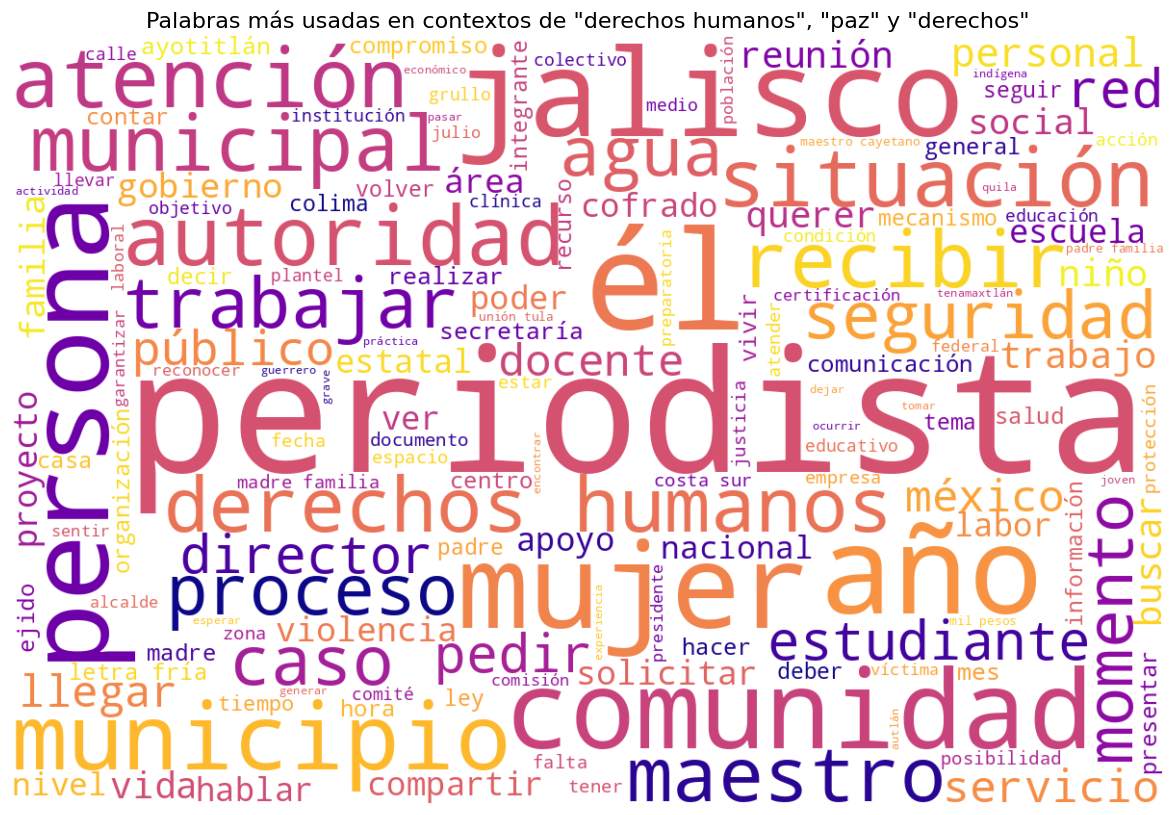

In [28]:

# Cargar el modelo de spaCy en español
nlp = spacy.load("es_core_news_md")

# --- 1. Definir palabras clave y filtrar artículos ---
palabras_clave = ["derechos humanos", "paz", "derechos"]  # Lista de temas a analizar

# Función para filtrar artículos que contengan al menos una palabra clave
def filtrar_por_temas(texto, palabras_clave):
    texto_lower = texto.lower()
    return any(keyword in texto_lower for keyword in palabras_clave)

# Suponiendo que tienes un DataFrame 'letra' con una columna 'articulo'
# Ejemplo: letra = pd.DataFrame([{"articulo": "Texto sobre derechos humanos..."}])
letra_filtrado = letra[letra["articulo"].apply(lambda x: filtrar_por_temas(x, palabras_clave))]

# --- 2. Procesar los textos filtrados (lematización) ---
def procesar_texto(texto):
    doc = nlp(texto)
    lemas = [
        token.lemma_.lower() for token in doc
        if not token.is_stop and token.is_alpha and len(token.lemma_) > 2
    ]
    return " ".join(lemas)

# Aplicar a los artículos filtrados
texto_procesado = " ".join(letra_filtrado["articulo"].apply(procesar_texto))

# --- 3. Generar la nube de palabras ---
wordcloud = WordCloud(
    width=1200,
    height=800,
    background_color='white',
    max_words=150,
    colormap='plasma',  # Otros colores: 'viridis', 'magma', 'inferno'
    stopwords=["ser", "haber", "paz", "derecho"]  # Añade stopwords manuales
).generate(texto_procesado)

# --- 4. Visualizar y guardar ---
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Palabras más usadas en contextos de "derechos humanos", "paz" y "derechos"', fontsize=16)
plt.savefig('nube_palabras_temas_especificos.png', bbox_inches='tight', dpi=300)
plt.show()

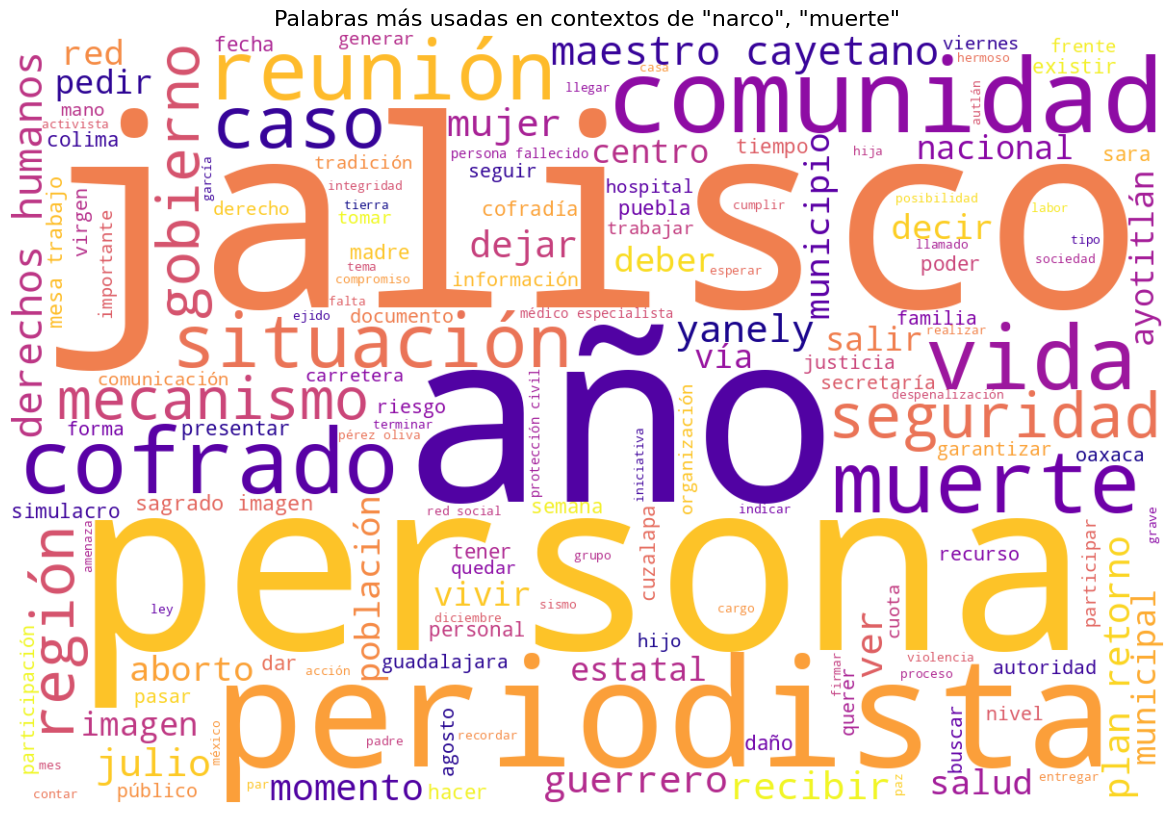

In [29]:
import spacy
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# Cargar el modelo de spaCy en español
nlp = spacy.load("es_core_news_md")

# --- 1. Definir palabras clave y filtrar artículos ---
palabras_clave = ["narco", "muerte"]  # Lista de temas a analizar

# Función para filtrar artículos que contengan al menos una palabra clave
def filtrar_por_temas(texto, palabras_clave):
    texto_lower = texto.lower()
    return any(keyword in texto_lower for keyword in palabras_clave)

# Suponiendo que tienes un DataFrame 'letra' con una columna 'articulo'
# Ejemplo: letra = pd.DataFrame([{"articulo": "Texto sobre derechos humanos..."}])
letra_filtrado = letra[letra["articulo"].apply(lambda x: filtrar_por_temas(x, palabras_clave))]

# --- 2. Procesar los textos filtrados (lematización) ---
def procesar_texto(texto):
    doc = nlp(texto)
    lemas = [
        token.lemma_.lower() for token in doc
        if not token.is_stop and token.is_alpha and len(token.lemma_) > 2
    ]
    return " ".join(lemas)

# Aplicar a los artículos filtrados
texto_procesado = " ".join(letra_filtrado["articulo"].apply(procesar_texto))

# --- 3. Generar la nube de palabras ---
wordcloud = WordCloud(
    width=1200,
    height=800,
    background_color='white',
    max_words=150,
    colormap='plasma',  # Otros colores: 'viridis', 'magma', 'inferno'
    stopwords=["ser", "él", "de", "y"]  # Añade stopwords manuales
).generate(texto_procesado)

# --- 4. Visualizar y guardar ---
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Palabras más usadas en contextos de "narco", "muerte"', fontsize=16)
plt.savefig('nube_palabras_temas__narco_especificos.png', bbox_inches='tight', dpi=300)
plt.show()

In [30]:
import pandas as pd

# Palabras clave a buscar (puedes añadir sinónimos o variantes)
palabras_clave = [
    "narco", 
    "narcotráfico", 
    "desaparecido", 
    "narcotraficante"
]

# Función para verificar si un artículo contiene ALGUNA de las palabras clave
def contiene_narco(texto):
    texto_lower = str(texto).lower()  # Convertir a string y minúsculas
    return any(keyword in texto_lower for keyword in palabras_clave)

# Aplicar la función a la columna 'articulo' y sumar los TRUE
conteo_ddhh = letra['articulo'].apply(contiene_narco).sum()

print(f"Número de artículos sobre narco: {conteo_ddhh} de {len(letra)}")

Número de artículos sobre narco: 9 de 602


In [31]:
import re

# Patrón regex: busca "derechos humanos" y variantes, evitando otros contextos
patron = r"\bderechos\s*humanos\b|\bdd\.?hh\.?\b|\bderecho\s*humano\b"

def conteo_regex(texto):
    return bool(re.search(patron, str(texto).lower(), flags=re.IGNORECASE))

conteo_preciso = letra['articulo'].apply(conteo_regex).sum()

print(f"Artículos sobre derechos humanos (regex): {conteo_preciso}")

Artículos sobre derechos humanos (regex): 21


## Análisis de Al Calor Político

In [33]:
# Loading every file as separate dataframes. I'm identifying them with distinct names, but we will be combining them into a single larger dataframe in a bit.
#La Voz del Sur

dfcalor = pd.read_csv('scraped data/noticias_alcalorpolitico.csv')
dfcalor

titulo  \
0      Magistrada Mónica Soto asume como presidenta d...   
1      Instructora de Orizaba lamenta “desvalorizació...   
2      Hacen “sándwich” a auto particular, en autopis...   
3      Seis lesionados en choque entre un taxi y un a...   
4      Limpian bulevar Manuel Ávila Camacho en Boca d...   
...                                                  ...   
23394  Asesinan a balazos a taquero en la colonia El ...   
23395  Domingo caluroso; posibles tormentas, lluvias ...   
23396  La Pascua es el corazón del año litúrgico y el...   
23397      Católicos celebran el Domingo de Resurrección   
23398  Con domingo de Resurrección, Arzobispo de Xala...   

                                 fecha        autor  \
0          Ciudad de México 01/01/2024  Desconocido   
1             Orizaba, Ver. 01/01/2024  Desconocido   
2      Fortín de las Flores 01/01/2024  Desconocido   
3        Rafael Lucio, Ver. 01/01/2024  Desconocido   
4                           01/01/2024  Desconocido   
...                                ...          ...   
23394         Córdoba, Ver. 20/04/2025  Desconocido   
23395          Xalapa, Ver. 20/04/2025  Desconocido   
23396          Xalapa, Ver. 20/04/2025  Desconocido   
23397          Xalapa, Ver. 20/04/2025  Desconocido   
23398          Xalapa, Ver. 20/04/2025  Desconocido   

                                               contenido  \
0      La magistrada Mónica Soto inició este 1° de en...   
1      Aunque a través de los talleres del DIF se bus...   
2      Daños materiales por varios miles de pesos y l...   
3      Seis lesionados dejó esta noche el choque entr...   
4      Con el “barrido” sobre el bulevar Manuel Ávila...   
...                                                  ...   
23394  Un taquero identificado como José Enrique "N",...   
23395  Probabilidad de lluvias, chubascos y tormentas...   
23396  Este Domingo de Resurrección, el mensaje que r...   
23397  Este 20 de abril, la comunidad católica celebr...   
23398  Este domingo de resurrección el arzobispo de l...   

                                                     url  longitud  \
0      https://www.alcalorpolitico.com/informacion/ma...      2173   
1      https://www.alcalorpolitico.com/informacion/in...      1494   
2      https://www.alcalorpolitico.com/informacion/ha...      1050   
3      https://www.alcalorpolitico.com/informacion/se...      1063   
4      https://www.alcalorpolitico.com/informacion/li...       374   
...                                                  ...       ...   
23394  https://www.alcalorpolitico.com/informacion/as...      1523   
23395  https://www.alcalorpolitico.com/informacion/do...      2103   
23396  https://www.alcalorpolitico.com/informacion/la...      1613   
23397  https://www.alcalorpolitico.com/informacion/ca...      1551   
23398  https://www.alcalorpolitico.com/informacion/co...      2448   

                      lugar fecha_limpia  
0          Ciudad de México   01/01/2024  
1              Orizaba, Ver   01/01/2024  
2      Fortín de las Flores   01/01/2024  
3         Rafael Lucio, Ver   01/01/2024  
4                       NaN   01/01/2024  
...                     ...          ...  
23394          Córdoba, Ver   20/04/2025  
23395           Xalapa, Ver   20/04/2025  
23396           Xalapa, Ver   20/04/2025  
23397           Xalapa, Ver   20/04/2025  
23398           Xalapa, Ver   20/04/2025  

[23399 rows x 8 columns]

In [38]:

import numpy as np

# Asumiendo que tu DataFrame se llama 'dfcalor' y tiene columna 'fecha_limpia'
# Convertimos a datetime para facilitar el manejo
dfcalor['fecha_limpia'] = pd.to_datetime(dfcalor['fecha_limpia'], errors='coerce')

# Eliminamos filas con fechas inválidas (por si acaso)
dfcalor = dfcalor.dropna(subset=['fecha_limpia'])

# Función para obtener muestra estratificada
def muestra_estratificada(df, fecha_col='fecha_limpia', muestras_por_dia=7):
    # Extraer año-mes-dia como columna separada
    df['fecha_str'] = df[fecha_col].dt.strftime('%Y-%m-%d')
    
    # Agrupar por día y muestrear
    muestra = (df.groupby('fecha_str', group_keys=False)
              .apply(lambda x: x.sample(min(len(x), muestras_por_dia), random_state=1)))
    
    return muestra.drop(columns=['fecha_str'])

# Aplicar la función
muestra_dfcalor = muestra_estratificada(dfcalor)

# Verificación
print(f"📊 Muestra obtenida: {len(muestra_dfcalor)} artículos")
print("Distribución por mes:")
print(muestra_dfcalor['fecha_limpia'].dt.to_period('M').value_counts().sort_index())

# Guardar como nuevo CSV
muestra_dfcalor.to_csv('muestra_estratificada_aldfcalor.csv', index=False, encoding='utf-8-sig')

/tmp/ipykernel_84850/1996271384.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcalor['fecha_limpia'] = pd.to_datetime(dfcalor['fecha_limpia'], errors='coerce')


📊 Muestra obtenida: 1344 artículos
Distribución por mes:
fecha_limpia
2024-01    84
2024-02    84
2024-03    84
2024-04    84
2024-05    84
2024-06    84
2024-07    84
2024-08    84
2024-09    84
2024-10    84
2024-11    84
2024-12    84
2025-01    28
2025-02    28
2025-03    28
2025-04    28
2025-05    28
2025-06    28
2025-07    28
2025-08    28
2025-09    28
2025-10    28
2025-11    28
2025-12    28
Freq: M, Name: count, dtype: int64


/tmp/ipykernel_84850/1996271384.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(min(len(x), muestras_por_dia), random_state=1)))


In [39]:
## Análisis de entidades con SpaCy


# Aplica a tu columna 'articulo'
muestra_dfcalor["analisis"] = muestra_dfcalor["contenido"].apply(analizar_articulo)

# Ejemplo de acceso a los resultados
print(muestra_dfcalor["analisis"])  # Ver análisis del primer artículo

14       {'entidades': [('Gubernatura de Veracruz', 'LO...
19       {'entidades': [('Instituto Mexicano del Seguro...
3        {'entidades': [('Xalapa', 'LOC'), ('Xalapa- La...
27       {'entidades': [('Manuel Ávila Camacho', 'PER')...
35       {'entidades': [('RESUMEN', 'MISC'), ('Estado d...
                               ...                        
23033    {'entidades': [('Manuel Alberto Ferrer', 'PER'...
23008    {'entidades': [('Centro Recreativo Xalapeño', ...
23024    {'entidades': [('Comité Ejecutivo Nacional', '...
23022    {'entidades': [('Xalapa', 'LOC'), ('Partido Re...
23026    {'entidades': [('Consejo General del Organismo...
Name: analisis, Length: 1344, dtype: object


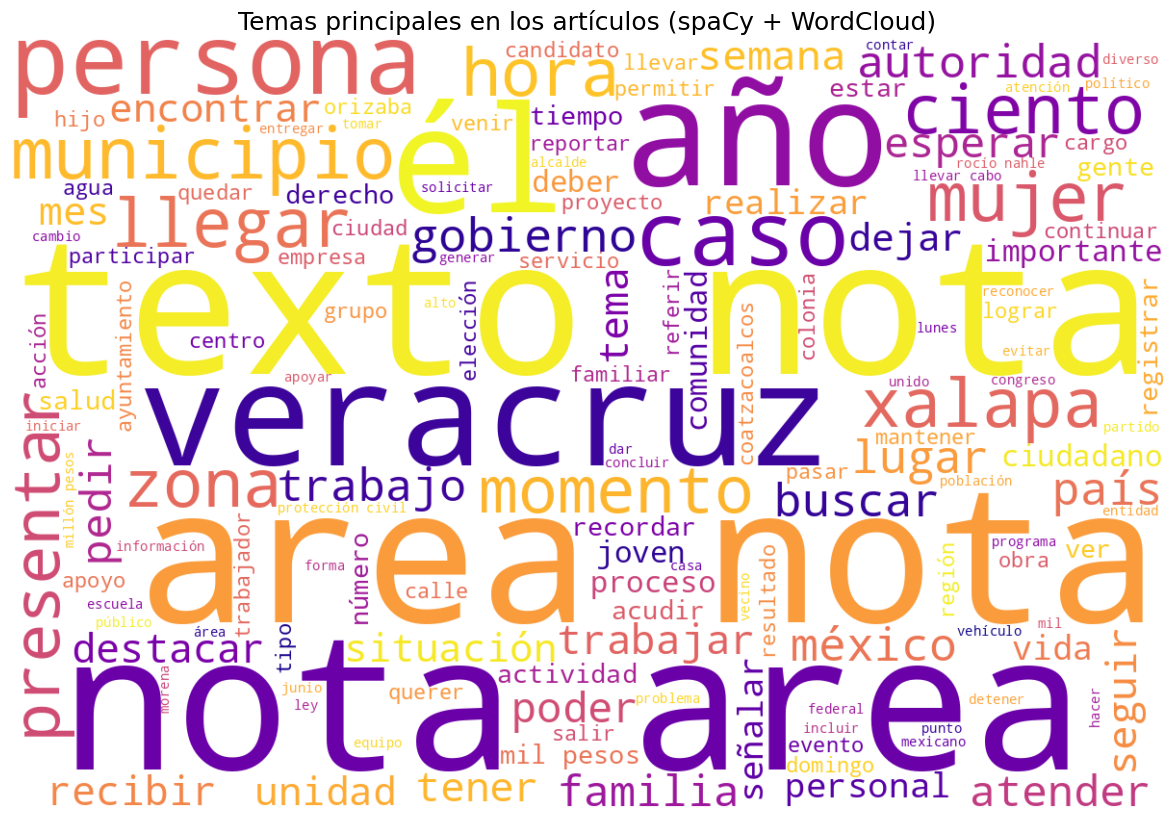

In [40]:


# Aplicar a todos los artículos (usando .progress_apply si tienes tqdm para barra de progreso)
texto_procesado = " ".join(muestra_dfcalor["contenido"].apply(procesar_texto))

# 2. Generar la nube de palabras
wordcloud = WordCloud(
    width=1200,
    height=800,
    background_color='white',
    max_words=150,
    colormap='plasma',  # Prueba 'viridis', 'magma', 'inferno'
    stopwords=["ser", "haber"]  # Añade stopwords manualmente si es necesario
).generate(texto_procesado)

# 3. Mostrar y guardar
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Temas principales en los artículos (spaCy + WordCloud)', fontsize=18)
plt.savefig('nube_palabras_spacy_muestra_calor.png', bbox_inches='tight', dpi=300)  # Guardar en HD
plt.show()

In [42]:
## Análisis de sentimiento
#Análisis de sentimiento

# 3. Aplicar al DataFrame 
muestra_dfcalor['sentimiento'] = muestra_dfcalor['contenido'].apply(clasificar_sentimiento)

# Ver resultados
print(muestra_dfcalor[['contenido', 'sentimiento']].head())

                                            contenido sentimiento
14  Desde las 00:00 horas de este martes quedará a...         NEU
19  El Instituto Mexicano del Seguro Social (IMSS)...         NEU
3   Seis lesionados dejó esta noche el choque entr...         NEU
27  Con el “barrido” sobre el bulevar Manuel Ávila...         NEU
35  RESUMEN Esta mañana se observa cielo mayorment...         NEU
